<a href="https://colab.research.google.com/github/ayush-singh110/X-Twitter-_Comments_Sentiment_Analysis/blob/main/X_Comments_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
df=pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [63]:
df1=pd.DataFrame(
    {'comments':df.iloc[:,3],'outcome':df.iloc[:,2]}
)
df1.head()

,comments,outcome
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [64]:
df1.to_csv("modified_twitter_sent.csv")

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  73995 non-null  object
 1   outcome   74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [18]:
df1.isnull().sum()

,0
comments,686
outcome,0


In [65]:
df1.dropna(inplace=True)

In [23]:
df1.isnull().sum()

,0
comments,0
outcome,0


In [66]:
indices_to_drop = df1[df1['outcome'].isin(['Neutral', 'Irrelevant'])].index
df1.drop(indices_to_drop, inplace=True)

In [67]:
data=df1['outcome'].value_counts()
data

,count
outcome,
Negative,22358
Positive,20654


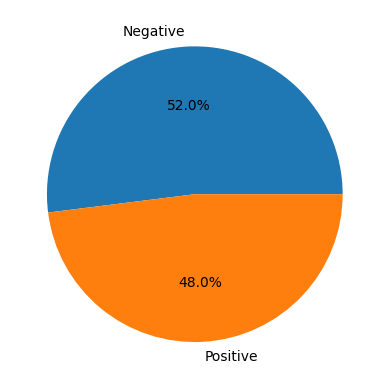

In [32]:
plt.pie(data,labels=data.index,autopct='%1.1f%%')
plt.show()

In [37]:
lemm=WordNetLemmatizer()

In [69]:
corpus=[]
for i in df1['comments']:
  review=re.sub('[^a-z A-z]','',i)
  review=review.lower()
  review=review.split()
  review=[lemm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=100)
X=tf.fit_transform(corpus).toarray()

In [71]:
df1[df1['outcome']=='Negative']="negative"
df1[df1['outcome']=='Positive']="positive"

In [72]:
df1['outcome'].value_counts()

,count
outcome,
negative,22358
positive,20654


In [73]:
y=df1['outcome']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [76]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [78]:
print(accuracy_score(y_test,y_pred))

0.7964663489480414
